# Project: Wrangling and Analyze Data

## Introduction

The WeRateDogs dataset offers a rich source of information from the popular Twitter account known for its humorous and heartwarming ratings of dog photos. This dataset includes a Twitter archive, tweet image predictions, and additional JSON data, providing a comprehensive view of tweet interactions and image classifications. The primary objective of this analysis was to uncover valuable insights about engagement trends, dog stage popularity, and the performance of image classification predictions. By conducting a detailed examination of favorite counts, dog stage distributions, and prediction accuracy, this report aims to shed light on the factors driving engagement and the effectiveness of the classification model used.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
twitter = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

if response.status_code == 200:
    with open("image_predictions.tsv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully!")
else:
    print("Failed to download the file. Status code:", response.status_code)

File downloaded successfully!


In [4]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### I couldn't access the data using the API since it is no longer free so I used the file in the classroom.

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

try:
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepyException as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
except tweepy.TweepyException as e:
    print("API initialization failed")
    fails_dict['init'] = e

end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426


C:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:301: SyntaxWarning: invalid escape sequence '\['
  """home_timeline(*, count, since_id, max_id, trim_user, \
C:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:341: SyntaxWarning: invalid escape sequence '\['
  """mentions_timeline(*, count, since_id, max_id, trim_user, \
C:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:376: SyntaxWarning: invalid escape sequence '\['
  """user_timeline(*, user_id, screen_name, since_id, count, max_id, \
C:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:426: SyntaxWarning: invalid escape sequence '\['
  """get_favorites(*, user_id, screen_name, count, since_id, max_id, \
C:\Users\Ahmed Osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\tweepy\api.py:467: SyntaxWarning: invalid escape sequence '\['
  """lookup_statuses(id,

KeyboardInterrupt: 

In [6]:
import json
data = []

with open('tweet_json-copy.txt', 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

tweet = pd.json_normalize(data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter DataFrame

In [7]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

* *There are some retweeted and reply posts*   **Quality issue**
* *timestamp column should be DateTime*   **Quality issue**
* *The stages of the dog should be in one column with category datatype*   **Tidiness issue**
* *The source column should be categorical*   **Quality issue**

In [8]:
twitter.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1023  746521445350707200                    NaN                  NaN   
181   857029823797047296                    NaN                  NaN   
1149  726828223124897792                    NaN                  NaN   
2031  671768281401958400                    NaN                  NaN   
1193  717537687239008257                    NaN                  NaN   

                      timestamp  \
1023  2016-06-25 01:52:36 +0000   
181   2017-04-26 00:33:27 +0000   
1149  2016-05-01 17:38:46 +0000   
2031  2015-12-01 19:10:13 +0000   
1193  2016-04-06 02:21:30 +0000   

                                                 source  \
1023  <a href="http://twitter.com/download/iphone" r...   
181   <a href="http://twitter.com/download/iphone" r...   
1149  <a href="http://twitter.com/download/iphone" r...   
2031  <a href="http://twitter.com/download/iphone" r...   
1193  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
181   This is Zeke. He performs group cheeky wink tu...                  NaN   
1149  This is Bloop. He's a Phoenician Winnebago. To...                  NaN   
2031  When you try to recreate the scene from Lady &...                  NaN   
1193  People please. This is a Deadly Mediterranean ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
181                        NaN                        NaN   
1149                       NaN                        NaN   
2031                       NaN                        NaN   
1193                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1023  https://twitter.com/dog_rates/status/667866724...                10   
181   https://twitter.com/dog_rates/status/857029823...                12   
1149  https://twitter.com/dog_rates/status/726828223...                12   
2031  https://twitter.com/dog_rates/status/671768281...                10   
1193  https://twitter.com/dog_rates/status/717537687...                11   

      rating_denominator    name doggo floofer pupper puppo  
1023                  10  Shaggy   NaN     NaN    NaN   NaN  
181                   10    Zeke   NaN     NaN    NaN   NaN  
1149                  10   Bloop   NaN     NaN    NaN   NaN  
2031                  10     NaN   NaN     NaN    NaN   NaN  
1193                  10       a   NaN     NaN    NaN   NaN

* *The source is in HTML format*    **Tidiness issue** 

In [9]:
mode = twitter['rating_denominator'].mode()[0]
twitter[twitter['rating_denominator'] != mode]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

* *Some rows doesn't have 10 as denominator* **Quality issue**

In [10]:
# Checking for duplicates
twitter[twitter.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [11]:
list(twitter['name'].items())

[(0, 'Phineas'),
 (1, 'Tilly'),
 (2, 'Archie'),
 (3, 'Darla'),
 (4, 'Franklin'),
 (5, nan),
 (6, 'Jax'),
 (7, nan),
 (8, 'Zoey'),
 (9, 'Cassie'),
 (10, 'Koda'),
 (11, 'Bruno'),
 (12, nan),
 (13, 'Ted'),
 (14, 'Stuart'),
 (15, 'Oliver'),
 (16, 'Jim'),
 (17, 'Zeke'),
 (18, 'Ralphus'),
 (19, 'Canela'),
 (20, 'Gerald'),
 (21, 'Jeffrey'),
 (22, 'such'),
 (23, 'Canela'),
 (24, nan),
 (25, nan),
 (26, 'Maya'),
 (27, 'Mingus'),
 (28, 'Derek'),
 (29, 'Roscoe'),
 (30, nan),
 (31, 'Waffles'),
 (32, nan),
 (33, 'Jimbo'),
 (34, 'Maisey'),
 (35, nan),
 (36, 'Lilly'),
 (37, nan),
 (38, 'Earl'),
 (39, 'Lola'),
 (40, 'Kevin'),
 (41, nan),
 (42, nan),
 (43, 'Yogi'),
 (44, 'Noah'),
 (45, 'Bella'),
 (46, 'Grizzwald'),
 (47, nan),
 (48, 'Rusty'),
 (49, 'Gus'),
 (50, 'Stanley'),
 (51, 'Alfy'),
 (52, 'Koko'),
 (53, 'Rey'),
 (54, 'Gary'),
 (55, nan),
 (56, 'a'),
 (57, 'Elliot'),
 (58, 'Louis'),
 (59, nan),
 (60, 'Bella'),
 (61, 'Jesse'),
 (62, nan),
 (63, 'Romeo'),
 (64, nan),
 (65, 'Bailey'),
 (66, 'Duddles'

* *Some names aren't dog names* **Quality issue**

In [12]:
#Checking for rows that have more than one stage
twitter[twitter[['doggo', 'floofer', 'pupper', 'puppo']].notna().sum(axis=1) >= 2]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
191   855851453814013952                    NaN                  NaN   
200   854010172552949760                    NaN                  NaN   
460   817777686764523521                    NaN                  NaN   
531   808106460588765185                    NaN                  NaN   
565   802265048156610565           7.331095e+17         4.196984e+09   
575   801115127852503040                    NaN                  NaN   
705   785639753186217984                    NaN                  NaN   
733   781308096455073793                    NaN                  NaN   
778   775898661951791106                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
889   759793422261743616                    NaN                  NaN   
956   751583847268179968                    NaN                  NaN   
1063  741067306818797568                    NaN                  NaN   
1113  733109485275860992                    NaN                  NaN   

                      timestamp  \
191   2017-04-22 18:31:02 +0000   
200   2017-04-17 16:34:26 +0000   
460   2017-01-07 16:59:28 +0000   
531   2016-12-12 00:29:28 +0000   
565   2016-11-25 21:37:47 +0000   
575   2016-11-22 17:28:25 +0000   
705   2016-10-11 00:34:48 +0000   
733   2016-09-29 01:42:20 +0000   
778   2016-09-14 03:27:11 +0000   
822   2016-08-29 03:00:36 +0000   
889   2016-07-31 16:50:42 +0000   
956   2016-07-09 01:08:47 +0000   
1063  2016-06-10 00:39:48 +0000   
1113  2016-05-19 01:38:16 +0000   

                                                 source  \
191   <a href="http://twitter.com/download/iphone" r...   
200   <a href="http://twitter.com/download/iphone" r...   
460   <a href="http://twitter.com/download/iphone" r...   
531   <a href="http://twitter.com/download/iphone" r...   
565   <a href="http://twitter.com/download/iphone" r...   
575   <a href="http://twitter.com/download/iphone" r...   
705   <a href="http://twitter.com/download/iphone" r...   
733   <a href="http://vine.co" rel="nofollow">Vine -...   
778   <a href="http://twitter.com/download/iphone" r...   
822   <a href="http://twitter.com/download/iphone" r...   
889   <a href="http://twitter.com/download/iphone" r...   
956   <a href="http://twitter.com/download/iphone" r...   
1063  <a href="http://twitter.com/download/iphone" r...   
1113  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
191   Here's a puppo participating in the #ScienceMa...                  NaN   
200   At first I thought this was a shy doggo, but i...                  NaN   
460   This is Dido. She's playing the lead role in "...                  NaN   
531   Here we have Burke (pupper) and Dexter (doggo)...                  NaN   
565   Like doggo, like pupper version 2. Both 11/10 ...                  NaN   
575   This is Bones. He's being haunted by another d...                  NaN   
705   This is Pinot. He's a sophisticated doggo. You...                  NaN   
733   Pupper butt 1, Doggo 0. Both 12/10 https://t.c...                  NaN   
778   RT @dog_rates: Like father (doggo), like son (...         7.331095e+17   
822   RT @dog_rates: This is just downright precious...         7.410673e+17   
889   Meet Maggie &amp; Lila. Maggie is the doggo, L...                  NaN   
956   Please stop sending it pictures that don't eve...                  NaN   
1063  This is just downright precious af. 12/10 for ...                  NaN   
1113  Like father (doggo), like son (pupper). Both 1...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
191                        NaN                        NaN   
200                        NaN                        NaN   
460                        NaN                        NaN   
531                        NaN                        NaN   
565              

* *Some rows have more than one stage* **Quality issue**

### Images DataFrame

In [13]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* *The img_num column should be categorical* **Quality issue**

In [14]:
images.sample(5)

tweet_id                                          jpg_url  \
1200  740995100998766593  https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg   
2055  888202515573088257  https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
1533  789986466051088384  https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   
97    667728196545200128  https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg   
714   685532292383666176  https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg   

      img_num          p1   p1_conf  p1_dog                   p2   p2_conf  \
1200        1    malamute  0.454363    True              Samoyed  0.215967   
2055        2    Pembroke  0.809197    True  Rhodesian_ridgeback  0.054950   
1533        1         tub  0.479477   False              bathtub  0.325106   
97          1      kuvasz  0.360159    True     golden_retriever  0.293744   
714         1  white_wolf  0.318524   False                dingo  0.215436   

      p2_dog                  p3   p3_conf  p3_dog  
1200    True      Siberian_husky  0.077500    True  
2055    True              beagle  0.038915    True  
1533   False    golden_retriever  0.078530    True  
97      True  Labrador_retriever  0.270673    True  
714    False              collie  0.095805    True

In [15]:
# Checking for duplicates
images[images.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

### Tweet DataFrame

In [16]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Columns: 326 entries, created_at to place.bounding_box.coordinates
dtypes: bool(18), float64(58), int64(9), object(241)
memory usage: 5.6+ MB


* *Too many columns* **Quality issue**

In [17]:
tweet.sample(5)

created_at                  id              id_str  \
367   Mon Feb 06 20:55:28 +0000 2017  828708714936930305  828708714936930305   
350   Tue Feb 14 02:02:51 +0000 2017  831322785565769729  831322785565769729   
2306  Wed Nov 18 03:18:55 +0000 2015  666817836334096384  666817836334096384   
1135  Thu May 05 02:21:37 +0000 2016  728046963732717569  728046963732717569   
2175  Tue Nov 24 06:17:19 +0000 2015  669037058363662336  669037058363662336   

                                              full_text  truncated  \
367   This is Fiona. She's an exotic dog. Seems rath...      False   
350   This is Pete. He has no eyes. Needs a guide do...      False   
2306  This is Jeph. He is a German Boston Shuttlecoc...      False   
1135  This is Raymond. He controls fountains with hi...      False   
2175  Here we have Pancho and Peaches. Pancho is a C...      False   

     display_text_range                                             source  \
367            [0, 133]  <a href="http://twitter.com/download/iphone" r...   
350            [0, 116]  <a href="http://twitter.com/download/iphone" r...   
2306           [0, 137]  <a href="http://twitter.com/download/iphone" r...   
1135            [0, 81]  <a href="http://twitter.com/download/iphone" r...   
2175           [0, 141]  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  \
367                     NaN                      None                  NaN   
350                     NaN                      None                  NaN   
2306                    NaN                      None                  NaN   
1135                    NaN                      None                  NaN   
2175                    NaN                      None                  NaN   

      ... place.id place.url place.place_type place.name  place.full_name  \
367   ...      NaN       NaN              NaN        NaN              NaN   
350   ...      NaN       NaN              NaN        NaN              NaN   
2306  ...      NaN       NaN              NaN        NaN              NaN   
1135  ...      NaN       NaN              NaN        NaN              NaN   
2175  ...      NaN       NaN              NaN        NaN              NaN   

     place.country_code  place.country  place.contained_within  \
367                 NaN            NaN                     NaN   
350                 NaN            NaN                     NaN   
2306                NaN            NaN                     NaN   
1135                NaN            NaN                     NaN   
2175                NaN            NaN                     NaN   

      place.bounding_box.type  place.bounding_box.coordinates  
367                       NaN                             NaN  
350                       NaN                             NaN  
2306                      NaN                             NaN  
1135                      NaN                             NaN  
2175                      NaN                             NaN  

[5 rows x 326 columns]

* *A lot of missing values* **Quality issue**

In [18]:
# Get a list of columns with their data types
[(col, dtype) for col, dtype in tweet.dtypes.items()]

[('created_at', dtype('O')),
 ('id', dtype('int64')),
 ('id_str', dtype('O')),
 ('full_text', dtype('O')),
 ('truncated', dtype('bool')),
 ('display_text_range', dtype('O')),
 ('source', dtype('O')),
 ('in_reply_to_status_id', dtype('float64')),
 ('in_reply_to_status_id_str', dtype('O')),
 ('in_reply_to_user_id', dtype('float64')),
 ('in_reply_to_user_id_str', dtype('O')),
 ('in_reply_to_screen_name', dtype('O')),
 ('geo', dtype('O')),
 ('coordinates', dtype('O')),
 ('place', dtype('float64')),
 ('contributors', dtype('O')),
 ('is_quote_status', dtype('bool')),
 ('retweet_count', dtype('int64')),
 ('favorite_count', dtype('int64')),
 ('favorited', dtype('bool')),
 ('retweeted', dtype('bool')),
 ('possibly_sensitive', dtype('O')),
 ('possibly_sensitive_appealable', dtype('O')),
 ('lang', dtype('O')),
 ('entities.hashtags', dtype('O')),
 ('entities.symbols', dtype('O')),
 ('entities.user_mentions', dtype('O')),
 ('entities.urls', dtype('O')),
 ('entities.media', dtype('O')),
 ('extended_

* *The lang column should be in category data type* **Quality issue**

### Quality issues
1. A lot of missing values

2. There are some retweeted and reply posts

3. Some rows doesn't have 10 as a rating denominator

4. A lot of unneeded columns

5. The source is in HTML format

6. Some rows have more than one dog stage

7. timestamp column should be DateTime

8. source, lang, stage and img_num columns should be category

9. Some names aren't dog names

### Tidiness issues
1. The stages of the dog should be in one column

2. All the tables must be merged since they form a unique dataset and will be used to solve the same problem.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
twitter_cp = twitter.copy()
images_cp = images.copy()
tweet_cp = tweet.copy()

### Issue #1: A lot of missing values

#### Define: 
*I will drop the columns that consists mostly of null values using a threshold and those that consists of the same value because it's considered a null value*

#### Code

In [20]:
threshold = 0.9
null_columns = tweet_cp.columns[tweet_cp.isnull().sum() > int((1 - threshold) * len(tweet_cp))].tolist()
null_columns

['in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'entities.media',
 'extended_entities.media',
 'user.utc_offset',
 'user.time_zone',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweeted_status.created_at',
 'retweeted_status.id',
 'retweeted_status.id_str',
 'retweeted_status.full_text',
 'retweeted_status.truncated',
 'retweeted_status.display_text_range',
 'retweeted_status.entities.hashtags',
 'retweeted_status.entities.symbols',
 'retweeted_status.entities.user_mentions',
 'retweeted_status.entities.urls',
 'retweeted_status.source',
 'retweeted_status.in_reply_to_status_id',
 'retweeted_status.in_reply_to_status_id_str',
 'retweeted_status.in_reply_to_user_id',
 'retweeted_status.in_reply_to_user_id_str',
 'retweeted_status.in_reply_to_screen_name',
 'retweeted_status.user.id',
 'retweeted_status.user.id_str',
 'retweeted_status.user.name

In [21]:
tweet_cp.drop( null_columns, axis = 1, inplace = True)

In [22]:
same_value_columns = tweet_cp.apply(lambda x: x.astype(str).nunique() == 1)
columns_with_same_value = same_value_columns[same_value_columns].index
columns_with_same_value

Index(['truncated', 'retweeted', 'entities.symbols', 'user.id', 'user.id_str',
       'user.name', 'user.screen_name', 'user.location', 'user.description',
       'user.url', 'user.entities.url.urls', 'user.entities.description.urls',
       'user.protected', 'user.friends_count', 'user.created_at',
       'user.geo_enabled', 'user.verified', 'user.statuses_count', 'user.lang',
       'user.contributors_enabled', 'user.is_translator',
       'user.is_translation_enabled', 'user.profile_background_color',
       'user.profile_background_image_url',
       'user.profile_background_image_url_https',
       'user.profile_background_tile', 'user.profile_image_url',
       'user.profile_image_url_https', 'user.profile_banner_url',
       'user.profile_link_color', 'user.profile_sidebar_border_color',
       'user.profile_sidebar_fill_color', 'user.profile_text_color',
       'user.profile_use_background_image', 'user.has_extended_profile',
       'user.default_profile', 'user.default_profile

In [23]:
tweet_cp.drop(columns=columns_with_same_value, inplace = True)

#### Test

In [24]:
tweet_cp.sample(5)

created_at                  id              id_str  \
2052  Mon Nov 30 18:07:47 +0000 2015  671390180817915904  671390180817915904   
920   Thu Jul 21 23:53:04 +0000 2016  756275833623502848  756275833623502848   
1841  Sun Dec 13 01:41:41 +0000 2015  675853064436391936  675853064436391936   
1691  Mon Dec 28 02:15:26 +0000 2015  681297372102656000  681297372102656000   
1291  Thu Mar 10 20:26:26 +0000 2016  708026248782585858  708026248782585858   

                                              full_text display_text_range  \
2052  Striped dog here. Having fun playing on back. ...           [0, 138]   
920   When ur older siblings get to play in the deep...           [0, 113]   
1841  Here we have an entire platoon of puppers. Tot...           [0, 107]   
1691  This is actually a lion. We only rate dogs. Fo...           [0, 139]   
1291  Everybody stop what you're doing and watch thi...           [0, 129]   

                                                 source  is_quote_status  \
2052  <a href="http://twitter.com/download/iphone" r...            False   
920   <a href="http://twitter.com/download/iphone" r...            False   
1841  <a href="http://twitter.com/download/iphone" r...            False   
1691  <a href="http://twitter.com/download/iphone" r...            False   
1291  <a href="http://twitter.com/download/iphone" r...            False   

      retweet_count  favorite_count  favorited possibly_sensitive  \
2052            805            1513      False              False   
920            1738            7114      False              False   
1841           1460            2927      False              False   
1691           1091            3490      False              False   
1291           2166            4799      False              False   

     possibly_sensitive_appealable lang entities.hashtags  \
2052                         False   en                []   
920                          False   en                []   
1841                         False   en                []   
1691                         False   en                []   
1291                         False   en                []   

                                 entities.user_mentions entities.urls  \
2052                                                 []            []   
920                                                  []            []   
1841                                                 []            []   
1691                                                 []            []   
1291  [{'screen_name': 'klbmatty', 'name': 'Kate Mat...            []   

      user.followers_count  user.listed_count  user.favourites_count  
2052               3201007               2812                 114031  
920                3200943               2802                 114031  
1841               3201002               2812                 114031  
1691               3200952               2805                 114031  
1291               3200947               2803                 114031

### Issue #2: Dog stages

#### Define 
*I created a stage column in twitter_cp by combining non-null values from the doggo, floofer, pupper, and puppo columns into a comma-separated string for each row. Then, I replaced the empty values with NaN so I can drop them effortlessly. After that, I dropped the columns*

#### Code

In [25]:
twitter_cp['stage'] = twitter_cp[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [26]:
twitter_cp['stage'] = twitter_cp['stage'].replace('', np.nan)

In [27]:
twitter_cp = twitter_cp.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [28]:
twitter_cp.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2141  669993076832759809                    NaN                  NaN   
877   760893934457552897                    NaN                  NaN   
817   770772759874076672                    NaN                  NaN   
1887  674788554665512960                    NaN                  NaN   
1026  746131877086527488                    NaN                  NaN   

                      timestamp  \
2141  2015-11-26 21:36:12 +0000   
877   2016-08-03 17:43:45 +0000   
817   2016-08-30 23:58:40 +0000   
1887  2015-12-10 03:11:43 +0000   
1026  2016-06-24 00:04:36 +0000   

                                                 source  \
2141  <a href="http://twitter.com/download/iphone" r...   
877   <a href="http://twitter.com/download/iphone" r...   
817   <a href="http://twitter.com/download/iphone" r...   
1887  <a href="http://twitter.com/download/iphone" r...   
1026  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2141  This is Zoey. Her dreams of becoming a hippo b...                  NaN   
877   This is Wishes. He has the day off. Daily stru...                  NaN   
817   This is Sebastian. He's super h*ckin fluffy. T...                  NaN   
1887  Say hello to Maggie. She's a Western Septic Do...                  NaN   
1026  This is Gustav. He has claimed that plant. It ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2141                       NaN                        NaN   
877                        NaN                        NaN   
817                        NaN                        NaN   
1887                       NaN                        NaN   
1026                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2141  https://twitter.com/dog_rates/status/669993076...                 9   
877   https://twitter.com/dog_rates/status/760893934...                11   
817   https://twitter.com/dog_rates/status/770772759...                11   
1887  https://twitter.com/dog_rates/status/674788554...                 9   
1026  https://twitter.com/dog_rates/status/746131877...                10   

      rating_denominator       name  stage  
2141                  10       Zoey    NaN  
877                   10     Wishes  doggo  
817                   10  Sebastian    NaN  
1887                  10     Maggie    NaN  
1026                  10     Gustav    NaN

In [29]:
twitter_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  stage                       380 n

### Issue #3: Merging Data

#### Define
*First I will rename the id column in the tweet_cp dataframe then I will merge the dataframes using the merge function into a master data frame(**df**)*

#### Code

In [30]:
# renaming the id column in tweet_cp dataframe to match the others
tweet_cp.rename(columns={'id': 'tweet_id'}, inplace=True)
merged_df = pd.merge(twitter_cp, tweet_cp, on='tweet_id', how='inner')
df = pd.merge(merged_df, images_cp, on='tweet_id', how='inner')

#### Test

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2073 non-null   int64  
 1   in_reply_to_status_id          23 non-null     float64
 2   in_reply_to_user_id            23 non-null     float64
 3   timestamp                      2073 non-null   object 
 4   source_x                       2073 non-null   object 
 5   text                           2073 non-null   object 
 6   retweeted_status_id            79 non-null     float64
 7   retweeted_status_user_id       79 non-null     float64
 8   retweeted_status_timestamp     79 non-null     object 
 9   expanded_urls                  2073 non-null   object 
 10  rating_numerator               2073 non-null   int64  
 11  rating_denominator             2073 non-null   int64  
 12  name                           1496 non-null   o

In [32]:
df.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1802  670822709593571328                    NaN                  NaN   
1928  668623201287675904                    NaN                  NaN   
455   802572683846291456                    NaN                  NaN   
671   768855141948723200                    NaN                  NaN   
2036  666447344410484738                    NaN                  NaN   

                      timestamp  \
1802  2015-11-29 04:32:51 +0000   
1928  2015-11-23 02:52:48 +0000   
455   2016-11-26 18:00:13 +0000   
671   2016-08-25 16:58:45 +0000   
2036  2015-11-17 02:46:43 +0000   

                                               source_x  \
1802  <a href="http://twitter.com/download/iphone" r...   
1928  <a href="http://twitter.com/download/iphone" r...   
455   <a href="http://twitter.com/download/iphone" r...   
671   <a href="http://twitter.com/download/iphone" r...   
2036  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1802  Can't do better than this lol. 10/10 for the o...                  NaN   
1928  This is Jomathan. He is not thrilled about the...                  NaN   
455   This is Winnie. She's h*ckin ferocious. Dandel...                  NaN   
671   This is Jesse. He really wants a belly rub. Wi...                  NaN   
2036  This is Scout. She is a black Downton Abbey. I...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1802                       NaN                        NaN   
1928                       NaN                        NaN   
455                        NaN                        NaN   
671                        NaN                        NaN   
2036                       NaN                        NaN   

                                          expanded_urls  ...  img_num  \
1802  https://twitter.com/dog_rates/status/670822709...  ...        1   
1928  https://twitter.com/dog_rates/status/668623201...  ...        4   
455   https://twitter.com/dog_rates/status/802572683...  ...        1   
671   https://twitter.com/dog_rates/status/768855141...  ...        1   
2036  https://twitter.com/dog_rates/status/666447344...  ...        1   

                          p1   p1_conf p1_dog                  p2   p2_conf  \
1802                web_site  0.993887  False           Chihuahua  0.001252   
1928               Chihuahua  0.708163   True          Pomeranian  0.091372   
455         golden_retriever  0.610171   True  Labrador_retriever  0.173252   
671                     chow  0.720219   True   Brabancon_griffon  0.058365   
2036  curly-coated_retriever  0.322084   True     giant_schnauzer  0.287955   

     p2_dog                  p3   p3_conf  p3_dog  
1802   True                menu  0.000599   False  
1928   True                titi  0.067325   False  
455    True      cocker_spaniel  0.163257    True  
671    True          Rottweiler  0.055113    True  
2036   True  Labrador_retriever  0.166331    True  

[5 rows x 43 columns]

### Issue #4: Unoriginality of tweets

#### Define
*I will keep only the common rows to the master dataframe(df) then I will drop the rows that contain retweeted and reply posts*

#### Code

In [33]:
#dropping the retweeted and reply posts
df = df[df['retweeted_status_id'].isna()]
df = df[df['in_reply_to_status_id'].isna()]

#### Test

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2072
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1971 non-null   int64  
 1   in_reply_to_status_id          0 non-null      float64
 2   in_reply_to_user_id            0 non-null      float64
 3   timestamp                      1971 non-null   object 
 4   source_x                       1971 non-null   object 
 5   text                           1971 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   retweeted_status_timestamp     0 non-null      object 
 9   expanded_urls                  1971 non-null   object 
 10  rating_numerator               1971 non-null   int64  
 11  rating_denominator             1971 non-null   int64  
 12  name                           1447 non-null   object

### Issue #5: Wrong rating

#### Define
*I should remove the rows with denominator other than 10*

#### Code

In [35]:
df = df[df['rating_denominator'] == 10]

#### Test

In [36]:
df[df['rating_denominator'] != 10]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source_x, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, stage, created_at, id_str, full_text, display_text_range, source_y, is_quote_status, retweet_count, favorite_count, favorited, possibly_sensitive, possibly_sensitive_appealable, lang, entities.hashtags, entities.user_mentions, entities.urls, user.followers_count, user.listed_count, user.favourites_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 43 columns]

### Issue #6: Unneeded columns

#### Define
*I will drop the columns that I wont need*

#### Code

In [37]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'created_at', 'full_text', 'retweeted_status_id',
         'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'id_str',
         'display_text_range', 'is_quote_status', 'favorited', 'possibly_sensitive', 'possibly_sensitive_appealable',
         'entities.hashtags', 'entities.user_mentions', 'entities.urls', 'user.listed_count', 'user.favourites_count', 'user.followers_count', 'source_y', 'jpg_url', 'rating_denominator'], axis = 1, inplace = True)

#### Test

In [38]:
df.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                            source_x  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

       name stage  retweet_count  favorite_count lang  img_num           p1  \
0   Phineas   NaN           8853           39467   en        1       orange   
1     Tilly   NaN           6514           33819   en        1    Chihuahua   
2    Archie   NaN           4328           25461   en        1    Chihuahua   
3     Darla   NaN           8964           42908   en        1  paper_towel   
4  Franklin   NaN           9774           41048   en        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German_short-haired_pointer  0.175219    True

### Issue #7: The source is in HTML format

#### Define
*I will get the text of the HTML using the beautiful soup HTML parser then drop the HTML column*

#### Code

In [39]:
from bs4 import BeautifulSoup

df['source'] = [BeautifulSoup(text, 'html.parser').get_text().strip() for text in df['source_x']]

In [40]:
df.drop('source_x', axis = 1, inplace = True)

#### Test

In [41]:
df.sample(5)

tweet_id                  timestamp  \
1708  672884426393653248  2015-12-04 21:05:23 +0000   
1639  674318007229923329  2015-12-08 20:01:55 +0000   
462   801285448605831168  2016-11-23 04:45:12 +0000   
808   749064354620928000  2016-07-02 02:17:13 +0000   
256   834086379323871233  2017-02-21 17:04:24 +0000   

                                                   text  rating_numerator  \
1708  Marvelous dog here. Rad ears. Not very soft. L...                 6   
1639  This is Lennon. He's in quite the predicament....                 8   
462               oh h*ck 10/10 https://t.co/bC69RrW559                10   
808   Meet Winston. He's pupset because I forgot to ...                11   
256   This is Lipton. He's a West Romanian Snuggle P...                12   

         name   stage  retweet_count  favorite_count lang  img_num  \
1708      NaN     NaN            897            1661   en        1   
1639   Lennon  pupper            570            1516   en        1   
462       NaN     NaN            960            6802   en        1   
808   Winston     NaN           1714            5277   en        2   
256    Lipton     NaN           2512           14296   en        1   

              p1   p1_conf  p1_dog                 p2   p2_conf  p2_dog  \
1708      tusker  0.122410   False            warthog  0.119870   False   
1639   porcupine  0.846628   False            hamster  0.038136   False   
462      minivan  0.789376   False        beach_wagon  0.081125   False   
808          pug  0.985222    True  Brabancon_griffon  0.003314    True   
256   bath_towel  0.736759   False       sleeping_bag  0.062959   False   

                      p3   p3_conf  p3_dog              source  
1708       water_buffalo  0.105856   False  Twitter for iPhone  
1639             echidna  0.014680   False  Twitter for iPhone  
462          convertible  0.064534   False  Twitter for iPhone  
808             Pekinese  0.002989    True  Twitter for iPhone  
256   Labrador_retriever  0.045263    True  Twitter for iPhone

### Issue #8: More than one dog stage in a row

#### Define
*I will identify those with more than one stage and correct them from the text.*

#### Code

In [42]:
double_stage = list(df.index[df['stage'].notna() & df['stage'].str.contains(',', regex=False)])
for row in double_stage:
    print(df['text'][row])
    print(df['stage'][row])
    

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
doggo,puppo
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
doggo,floofer
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
doggo,pupper
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
doggo,pupper
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
doggo,pupper
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2

In [43]:
replacement_values = ['puppo', 'doggo', 'pupper', 'pupper', 'pupper', 'doggo', 'doggo', 'doggo', 'pupper', 'pupper']
if len(replacement_values) != len(double_stage):
    raise ValueError("Replacement list length does not match the number of rows in double_stage.")
df.loc[double_stage, 'stage'] = replacement_values
# I have added a condition to see if there were an error and there is no errors and it worked perfectly fine

#### Test

In [44]:
df.loc[double_stage]

tweet_id                  timestamp  \
154  855851453814013952  2017-04-22 18:31:02 +0000   
160  854010172552949760  2017-04-17 16:34:26 +0000   
366  817777686764523521  2017-01-07 16:59:28 +0000   
429  808106460588765185  2016-12-12 00:29:28 +0000   
464  801115127852503040  2016-11-22 17:28:25 +0000   
566  785639753186217984  2016-10-11 00:34:48 +0000   
722  759793422261743616  2016-07-31 16:50:42 +0000   
780  751583847268179968  2016-07-09 01:08:47 +0000   
871  741067306818797568  2016-06-10 00:39:48 +0000   
917  733109485275860992  2016-05-19 01:38:16 +0000   

                                                  text  rating_numerator  \
154  Here's a puppo participating in the #ScienceMa...                13   
160  At first I thought this was a shy doggo, but i...                11   
366  This is Dido. She's playing the lead role in "...                13   
429  Here we have Burke (pupper) and Dexter (doggo)...                12   
464  This is Bones. He's being haunted by another d...                12   
566  This is Pinot. He's a sophisticated doggo. You...                10   
722  Meet Maggie &amp; Lila. Maggie is the doggo, L...                12   
780  Please stop sending it pictures that don't eve...                 5   
871  This is just downright precious af. 12/10 for ...                12   
917  Like father (doggo), like son (pupper). Both 1...                12   

       name   stage  retweet_count  favorite_count lang  img_num  \
154     NaN   puppo          19196           47844   en        1   
160     NaN   doggo           3433           17169   en        1   
366    Dido  pupper           3084           11901   en        1   
429     NaN  pupper           2525            9701   en        1   
464   Bones  pupper           2429            8992   en        1   
566   Pinot   doggo           2561            8735   en        1   
722  Maggie   doggo           2173            6620   en        2   
780     NaN   doggo           1265            4849   en        1   
871    just  pupper           3520           10342   en        1   
917     NaN  pupper          17621           44619   en        1   

                         p1   p1_conf  p1_dog                     p2  \
154   flat-coated_retriever  0.321676    True     Labrador_retriever   
160        English_springer  0.354733    True                 collie   
366  curly-coated_retriever  0.733256    True  flat-coated_retriever   
429        golden_retriever  0.426183    True     Labrador_retriever   
464               dalmatian  0.823356    True         English_setter   
566               porcupine  0.978042   False             sea_urchin   
722        golden_retriever  0.985876    True     Labrador_retriever   
780               dalmatian  0.868304    True           studio_couch   
871        golden_retriever  0.843799    True     Labrador_retriever   
917        golden_retriever  0.945523    True     Labrador_retriever   

      p2_conf  p2_dog                   p3   p3_conf  p3_dog  \
154  0.115138    True          groenendael  0.096100    True   
160  0.177538    True        Border_collie  0.131706    True   
366  0.214145    True  Irish_water_spaniel  0.029769    True   
429  0.257447    True       Great_Pyrenees  0.126482    True   
464  0.094602    True             bluetick  0.021953    True   
566  0.006106   False              echidna  0.005442   False   
722  0.001948    True               kuvasz  0.001752    True   
780  0.059623   False         snow_leopard  0.013876   False   
871  0.052956    True               kelpie  0.035711    True   
917  0.042319    True              doormat  0.003956   False   

                 source  
154  Twitter for iPhone  
160  Twitter for iPhone  
366  Twitter for iPhone  
429  Twitter for iPhone  
464  Twitter for iPhone  
566  Twitter for iPhone  
722  Twitter for iPhone  
780  Twitter for iPhone  
871  Twitter for iPhone  
917  Twitter for iPhone

### Issue #9: Timestamp Data Type

#### Define
*I will change the timestamp data type using the to_datetime method.*

#### Code

In [45]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1954 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1954 non-null   int64              
 1   timestamp         1954 non-null   datetime64[ns, UTC]
 2   text              1954 non-null   object             
 3   rating_numerator  1954 non-null   int64              
 4   name              1441 non-null   object             
 5   stage             303 non-null    object             
 6   retweet_count     1954 non-null   int64              
 7   favorite_count    1954 non-null   int64              
 8   lang              1954 non-null   object             
 9   img_num           1954 non-null   int64              
 10  p1                1954 non-null   object             
 11  p1_conf           1954 non-null   float64            
 12  p1_dog            1954 non-null   bool               
 13  p2      

### Issue #10: Data Type of source, lang, stage and img_num columns

#### Define
*I will use the astype method to convert the columns into category*

#### Code

In [47]:
df[['source', 'lang', 'img_num', 'stage']] = df[['source', 'lang', 'img_num', 'stage']].astype('category')

#### Test

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1954 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1954 non-null   int64              
 1   timestamp         1954 non-null   datetime64[ns, UTC]
 2   text              1954 non-null   object             
 3   rating_numerator  1954 non-null   int64              
 4   name              1441 non-null   object             
 5   stage             303 non-null    category           
 6   retweet_count     1954 non-null   int64              
 7   favorite_count    1954 non-null   int64              
 8   lang              1954 non-null   category           
 9   img_num           1954 non-null   category           
 10  p1                1954 non-null   object             
 11  p1_conf           1954 non-null   float64            
 12  p1_dog            1954 non-null   bool               
 13  p2      

### Issue #11: Unusual dog names

#### Define
*I will identify common words used in typing then I will drop the rows that contain them in the name*

#### Code

In [49]:
common_words = ['the', 'my', 'quite', 'a', 'an', 'and', 'is', 'to', 'of', 'in', 'for', 'on', 'with', 'as', 'by', 'at', 'this', 'that', 'it', 'or', 'but']

In [50]:
df = df[~df['name'].isin(common_words)]

#### Test

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1883 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1883 non-null   int64              
 1   timestamp         1883 non-null   datetime64[ns, UTC]
 2   text              1883 non-null   object             
 3   rating_numerator  1883 non-null   int64              
 4   name              1370 non-null   object             
 5   stage             297 non-null    category           
 6   retweet_count     1883 non-null   int64              
 7   favorite_count    1883 non-null   int64              
 8   lang              1883 non-null   category           
 9   img_num           1883 non-null   category           
 10  p1                1883 non-null   object             
 11  p1_conf           1883 non-null   float64            
 12  p1_dog            1883 non-null   bool               
 13  p2      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
# I didn't include the index in the file
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [53]:
#I will check the favourite count before and after the post of they are good dogs brent which is at 12-9-2016
date_threshold = pd.Timestamp('2016-09-12', tz='UTC')
before_threshold = df[df['timestamp'] <= date_threshold]
after_threshold = df[df['timestamp'] > date_threshold]

total_favorite_before = before_threshold['favorite_count'].sum()
total_favorite_after = after_threshold['favorite_count'].sum()

print(f"Total favorite count before 12-09-2016: {total_favorite_before}")
print(f"Total favorite count after 12-09-2016: {total_favorite_after}")

Total favorite count before 12-09-2016: 5852774
Total favorite count after 12-09-2016: 11313182


*We conclude that the favourites had almost doubled after the popular post*

In [54]:
df['stage'].value_counts()

stage
pupper     200
doggo       67
puppo       23
floofer      7
Name: count, dtype: int64

In [55]:
df.groupby('stage', observed=False)['favorite_count'].mean()

stage
doggo      18758.582090
floofer    13206.000000
pupper      7383.325000
puppo      22723.913043
Name: favorite_count, dtype: float64

*This data indicates that the puppo dogs are the favorite stage of dogs for the audience*

In [56]:
df['true_label'] = True

# Calculate accuracy for p1, p2, and p3 predictions
accuracy_p1 = (df['p1_dog'] == df['true_label']).mean()
accuracy_p2 = (df['p2_dog'] == df['true_label']).mean()
accuracy_p3 = (df['p3_dog'] == df['true_label']).mean()

# Print the accuracies and average confidences
print(f'Accuracy of p1 predictions: {accuracy_p1:.2f}')
print(f'Accuracy of p2 predictions: {accuracy_p2:.2f}')
print(f'Accuracy of p3 predictions: {accuracy_p3:.2f}')

Accuracy of p1 predictions: 0.74
Accuracy of p2 predictions: 0.75
Accuracy of p3 predictions: 0.73


In [57]:
# Calculate average confidence for correct predictions
avg_conf_p1_correct = df[df['p1_dog'] == df['true_label']]['p1_conf'].mean()
avg_conf_p2_correct = df[df['p2_dog'] == df['true_label']]['p2_conf'].mean()
avg_conf_p3_correct = df[df['p3_dog'] == df['true_label']]['p3_conf'].mean()

print(f'Average confidence of p1 correct predictions: {avg_conf_p1_correct:.2f}')
print(f'Average confidence of p2 correct predictions: {avg_conf_p2_correct:.2f}')
print(f'Average confidence of p3 correct predictions: {avg_conf_p3_correct:.2f}')

Average confidence of p1 correct predictions: 0.62
Average confidence of p2 correct predictions: 0.14
Average confidence of p3 correct predictions: 0.06


In [58]:
# Calculate overall average confidence
avg_conf_p1 = df['p1_conf'].mean()
avg_conf_p2 = df['p2_conf'].mean()
avg_conf_p3 = df['p3_conf'].mean()

print(f'Overall average confidence of p1 predictions: {avg_conf_p1:.2f}')
print(f'Overall average confidence of p2 predictions: {avg_conf_p2:.2f}')
print(f'Overall average confidence of p3 predictions: {avg_conf_p3:.2f}')

Overall average confidence of p1 predictions: 0.59
Overall average confidence of p2 predictions: 0.13
Overall average confidence of p3 predictions: 0.06


*This data indicates that the neural network is good at predicting the breed but lacks confidence in the second and third predictions.*

### Insights:
1. The number of favourites increased significantly after the "They're good dogs Brent" meme which is at 12-09-2016

2. The puppo dog type is the most favourited dog stage

3. The neural network is quite good at making correct predictions but lacks confidence in its second and third predictions.

### Visualization

In [59]:
import matplotlib.pyplot as plt

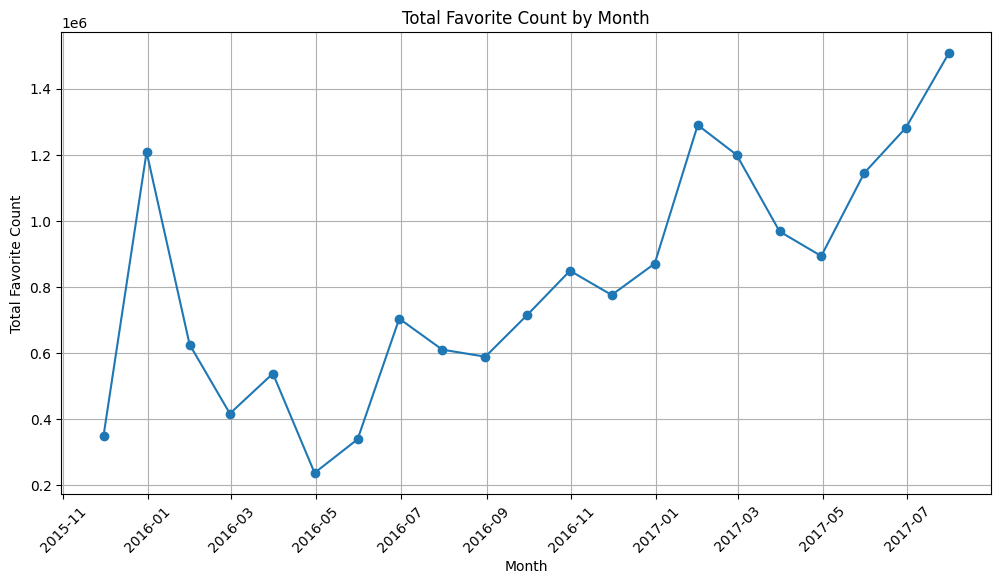

In [60]:
df.set_index('timestamp', inplace=True)
monthly_data = df['favorite_count'].resample('ME').sum().reset_index()
# I will remove the last month as it doesn't have many values
monthly_data = monthly_data[:-1]
# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['timestamp'], monthly_data['favorite_count'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Favorite Count')
plt.title('Total Favorite Count by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*This is the plot of the number of favorites over the time*

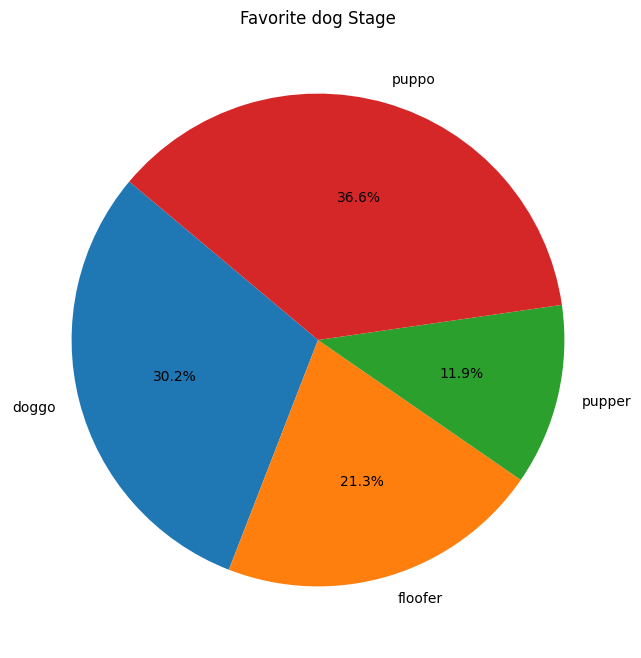

In [61]:
# mean for each stage because they are different in the number
stage_favorite_sum = df.groupby('stage', observed=False)['favorite_count'].mean()

plt.figure(figsize=(8, 8))
plt.pie(stage_favorite_sum, labels=stage_favorite_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Favorite dog Stage')
plt.show()


## Conclusion

The analysis of the WeRateDogs dataset reveals several key insights into tweet engagement and image classification performance. The dramatic increase in favorites following the "They're good dogs Brent" meme underscores the significant impact of viral content on engagement metrics. Additionally, the popularity of different dog stages indicates that "puppo" dogs receive the highest level of favorability, suggesting that followers particularly enjoy content featuring this category. Furthermore, while the image classification model demonstrates overall good accuracy, it shows varying levels of confidence across predictions, particularly for the second and third choices. These findings provide valuable context for understanding audience preferences and the strengths and limitations of the predictive model, ultimately contributing to more informed strategies for content creation and model improvement.